In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import df_E, df_D, df_A, df_S, df_B, df_L, df_M

In [25]:
def detect_anomalies(df, param):

    mean = df[param].mean()
    std = df[param].std()
    
    # Определение порогов для аномалий, считаем за анjмалии всё что отличается больше чем 3 сигма от среднего
    upper_threshold = mean + 3 * std
    lower_threshold = mean - 3 * std
    
    # добавляем столбец аномалий
    df[f"{param}_is_anomaly"] = np.where((df[param] > upper_threshold) | (df[param] < lower_threshold), True, False)
    
    return df

names = ['E', 'D', 'A', 'S', 'B', 'L', 'M']
c = 0
for df in [df_E, df_D, df_A, df_S, df_B, df_L, df_M]:
    print(f"Обработка DataFrame: {names[c]}")
    c += 1

    df = detect_anomalies(df, "co2")
    df = detect_anomalies(df, "hum")
    df = detect_anomalies(df, "lux")
    df = detect_anomalies(df, "noise")
    df = detect_anomalies(df, "temp")
    print(df.head())

Обработка DataFrame: E
                 date   co2  hum  lux  noise  temp  co2_is_anomaly  \
0 2023-12-26 12:23:13  1414   25   87   47.0  22.0            True   
1 2023-12-26 12:24:02   676   17  104   47.0  21.0           False   
2 2023-12-26 12:28:13  1401   24   87   52.0  22.0            True   
3 2023-12-26 12:29:02   681   17  107   47.0  21.0           False   
4 2023-12-26 12:34:10   673   17  112   47.0  21.0           False   

   hum_is_anomaly  lux_is_anomaly  noise_is_anomaly  temp_is_anomaly  
0           False           False             False            False  
1           False           False             False            False  
2           False           False              True            False  
3           False           False             False            False  
4           False           False             False            False  
Обработка DataFrame: D
                 date   co2  hum  lux  noise  temp  co2_is_anomaly  \
0 2023-12-26 12:23:06   704   12  102

Обработка DataFrame: E


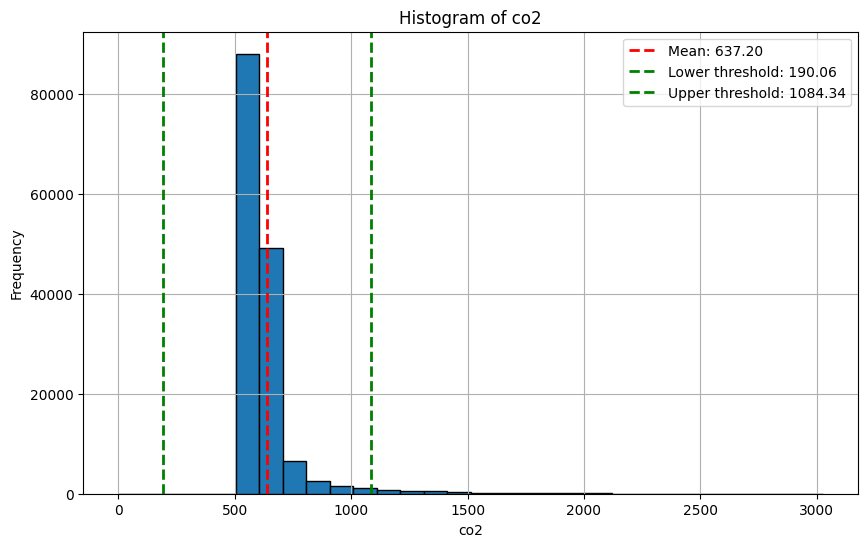

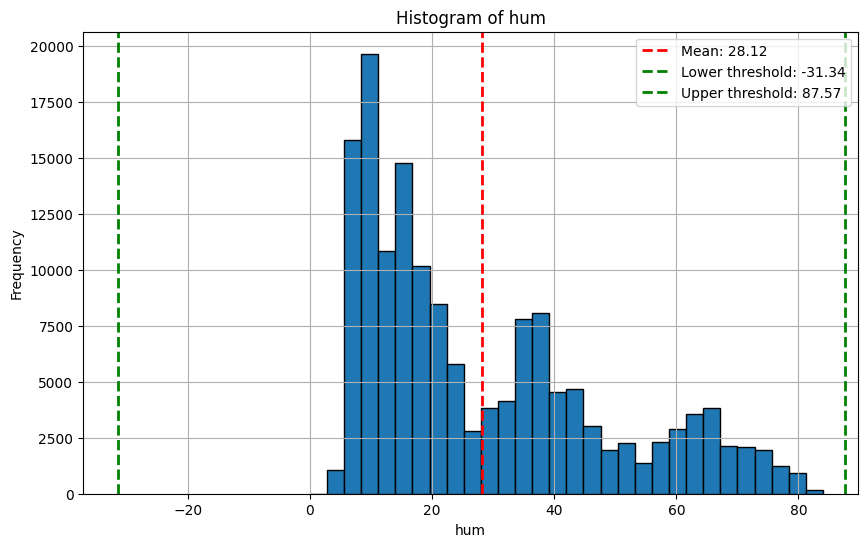

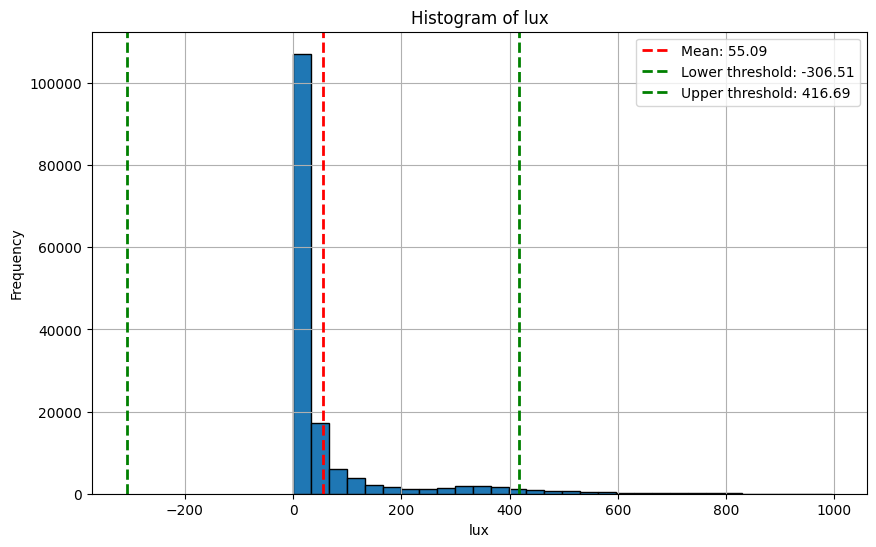

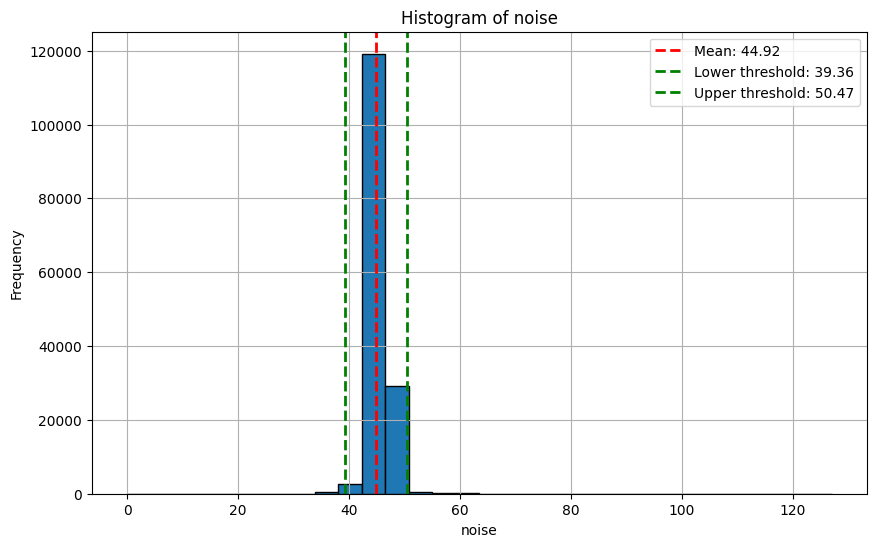

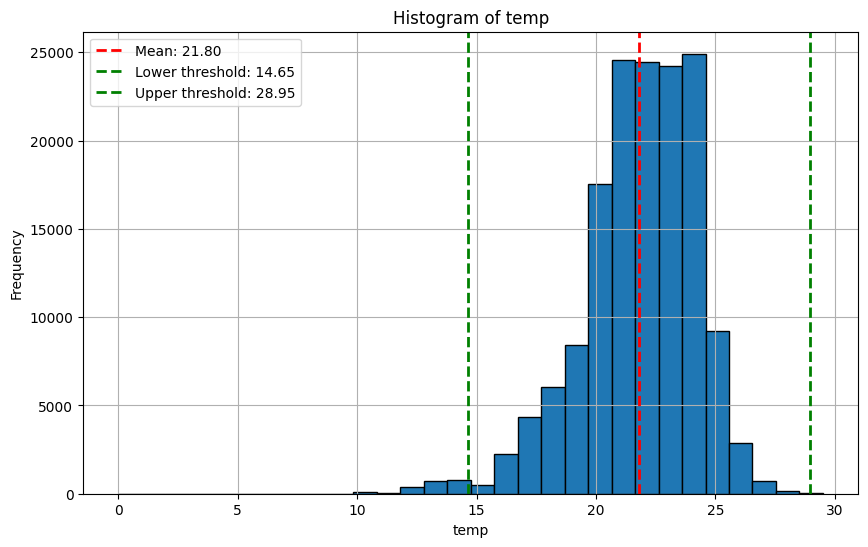

Обработка DataFrame: D


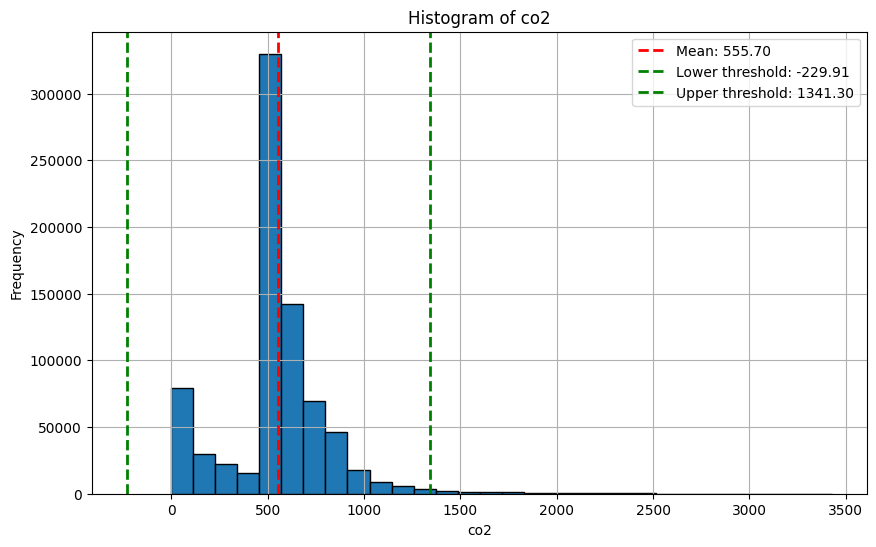

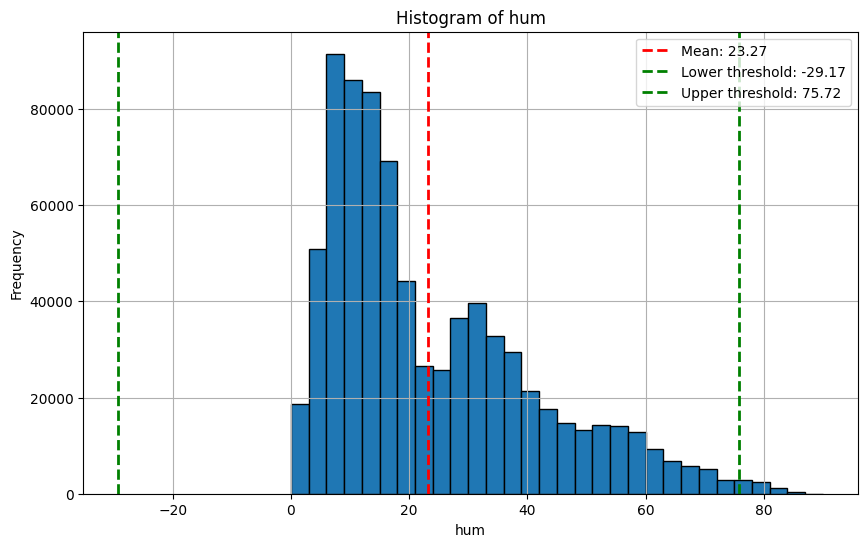

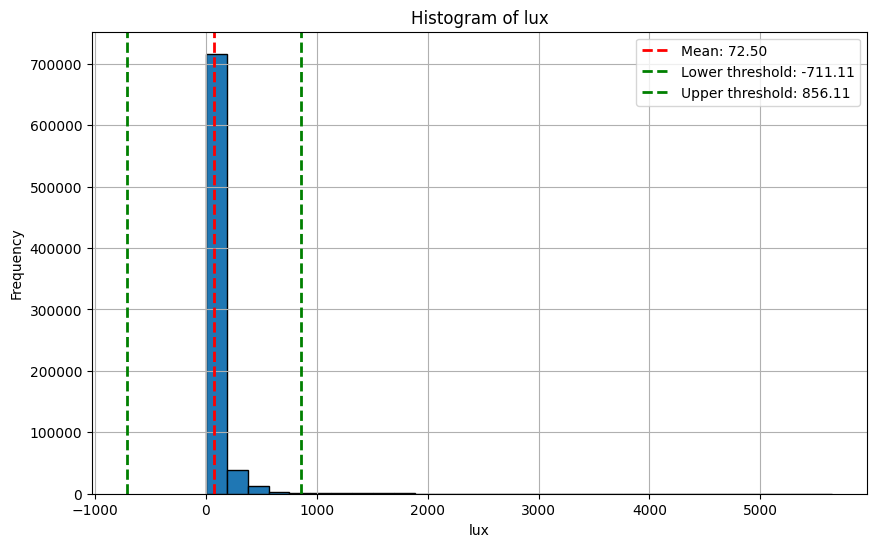

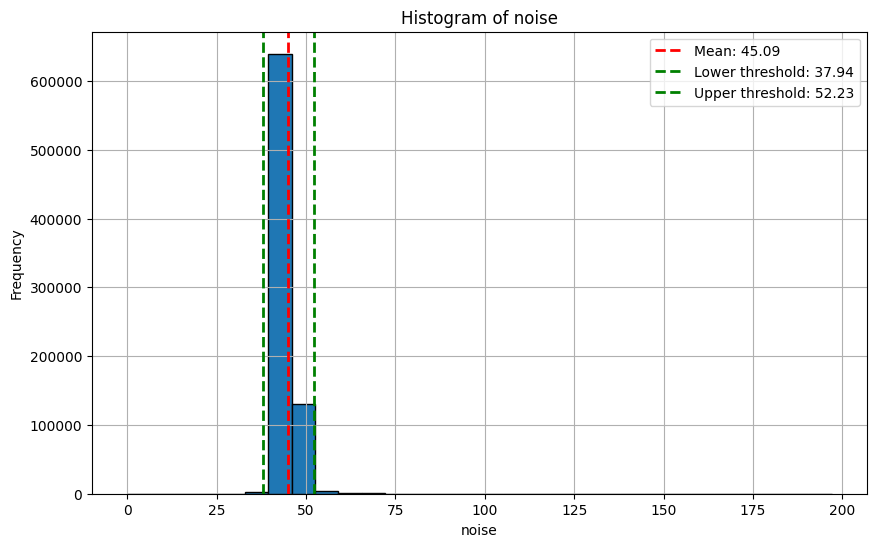

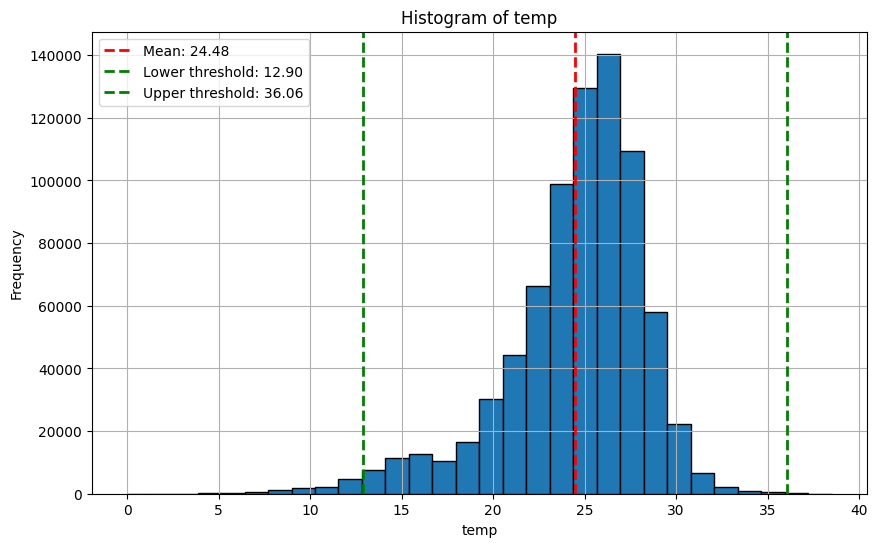

Обработка DataFrame: A


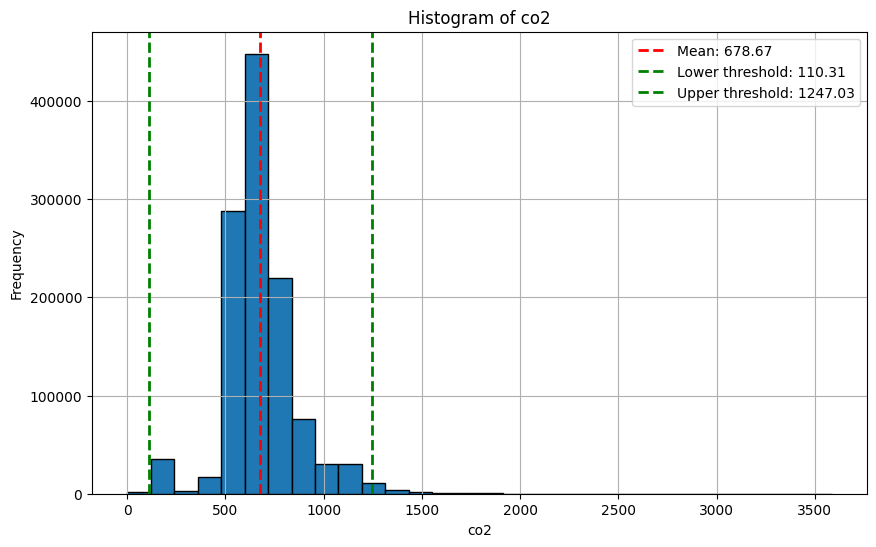

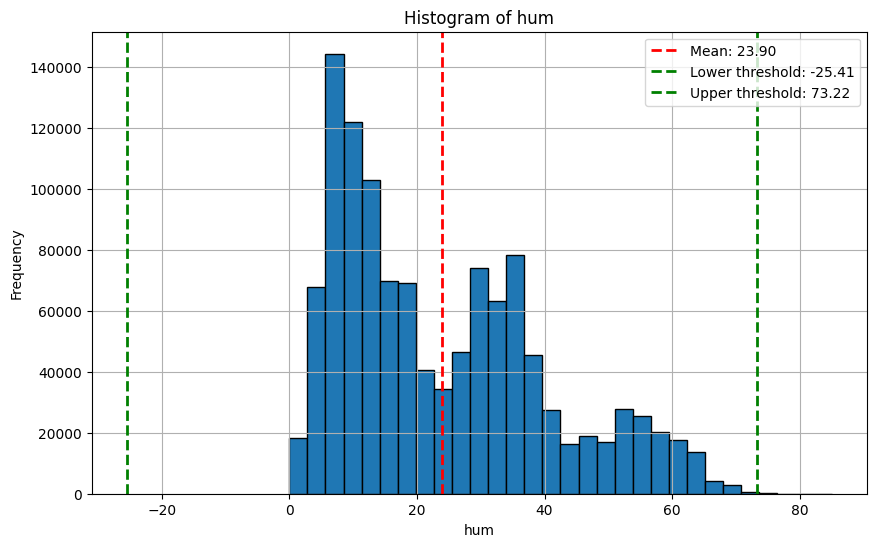

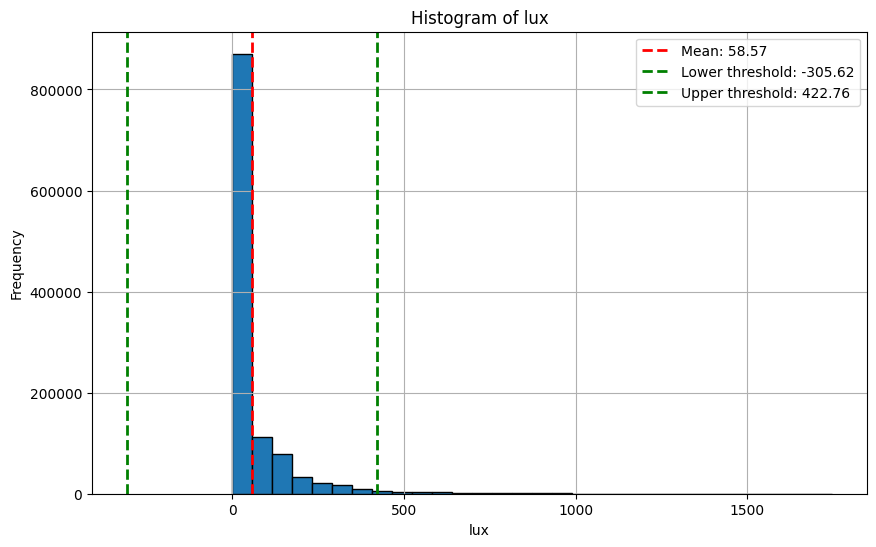

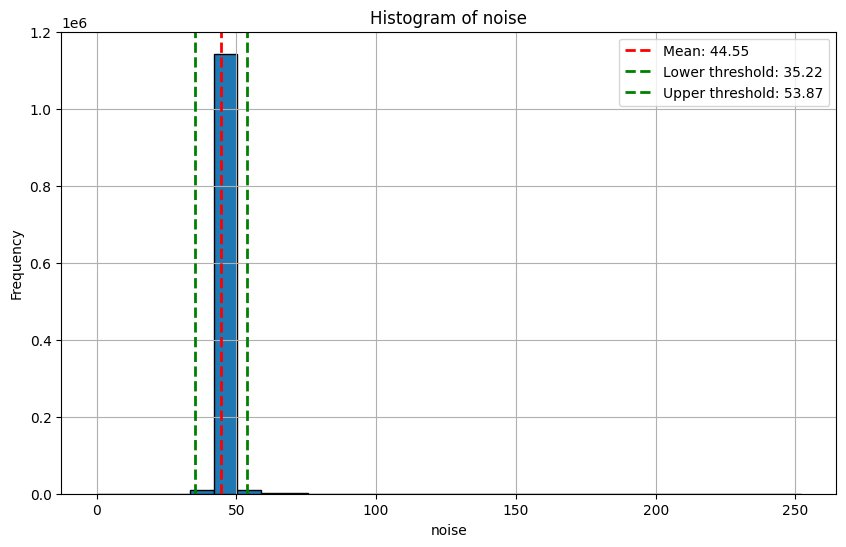

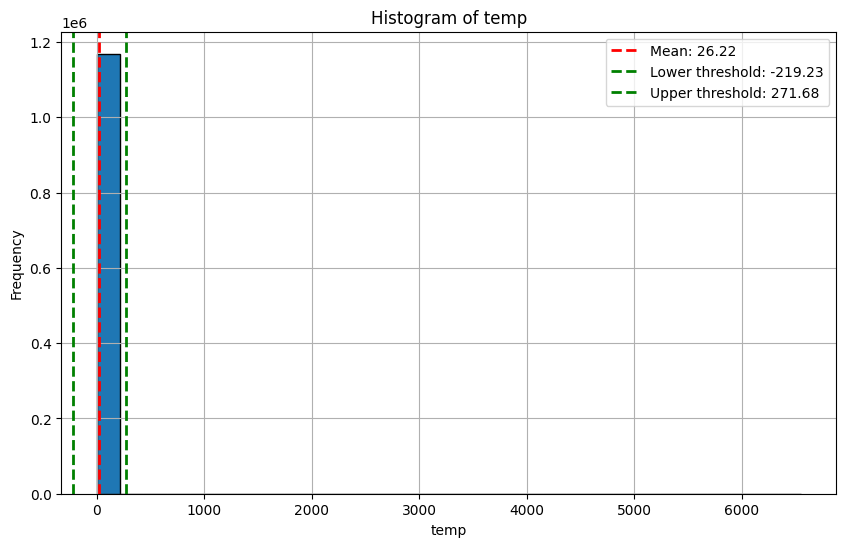

Обработка DataFrame: S


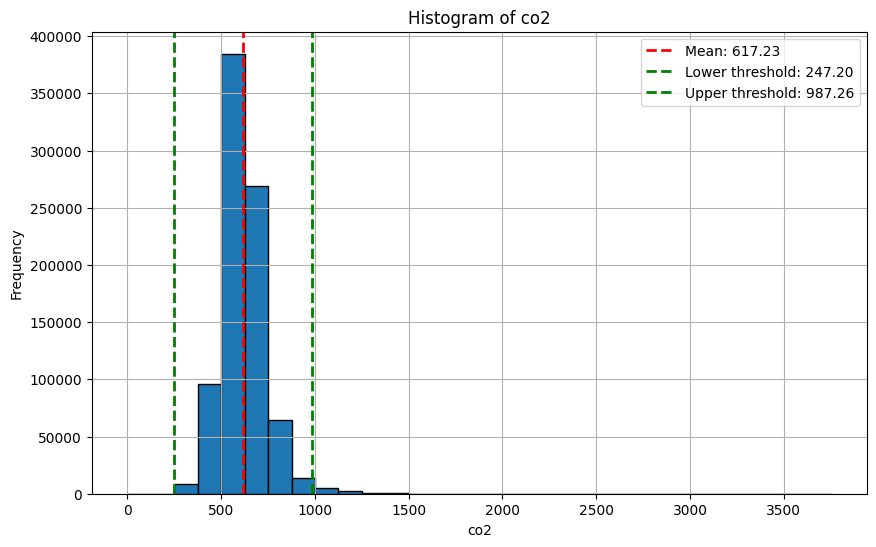

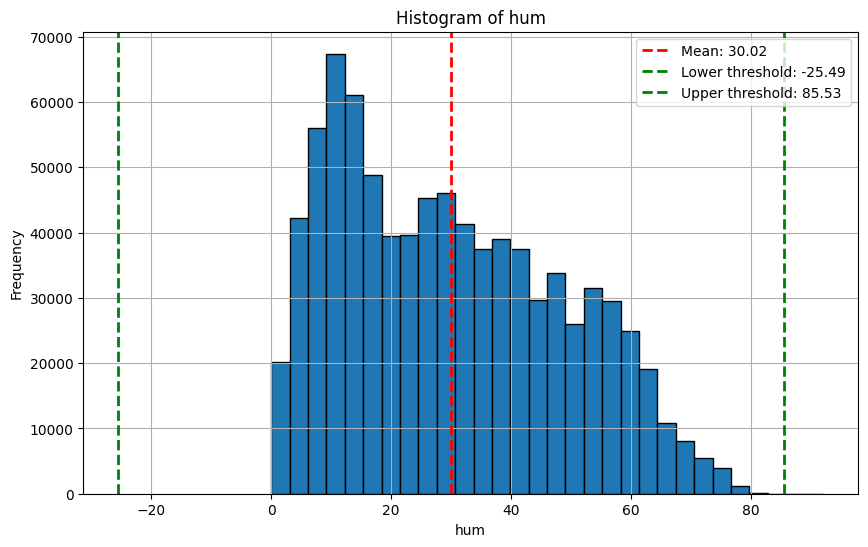

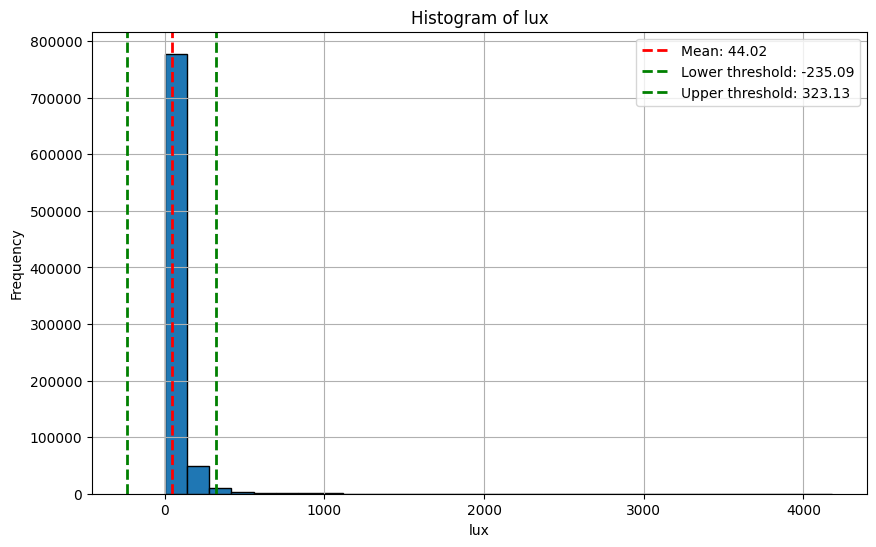

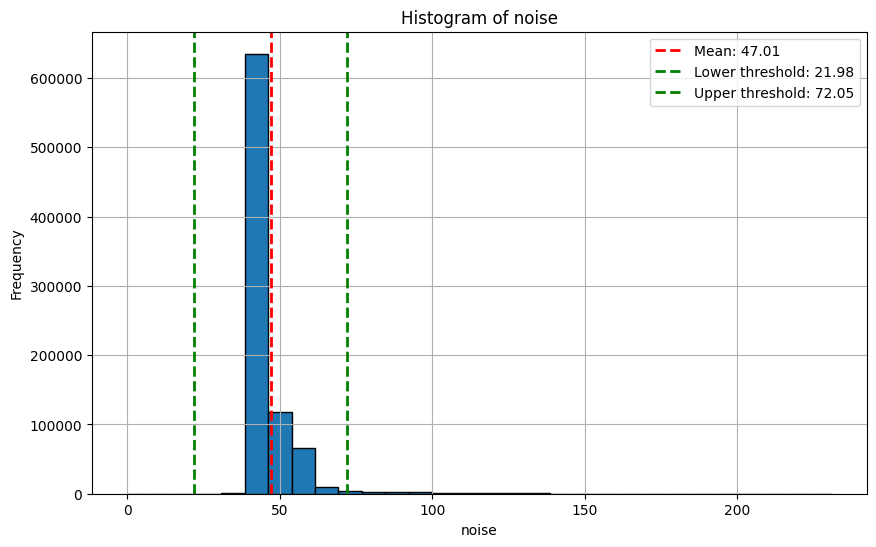

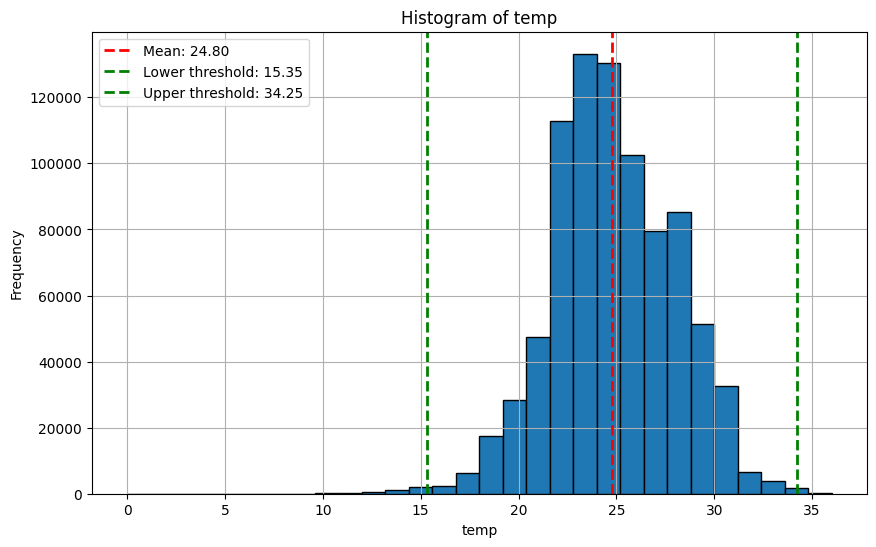

Обработка DataFrame: B


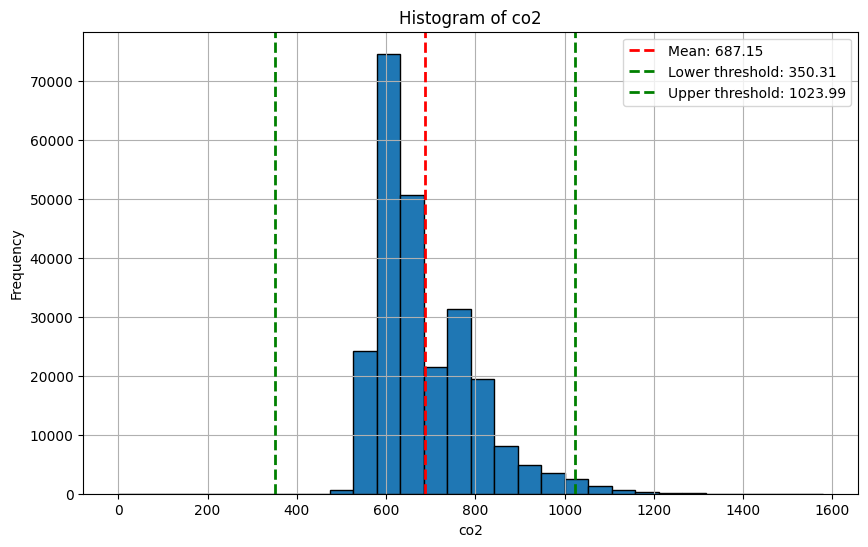

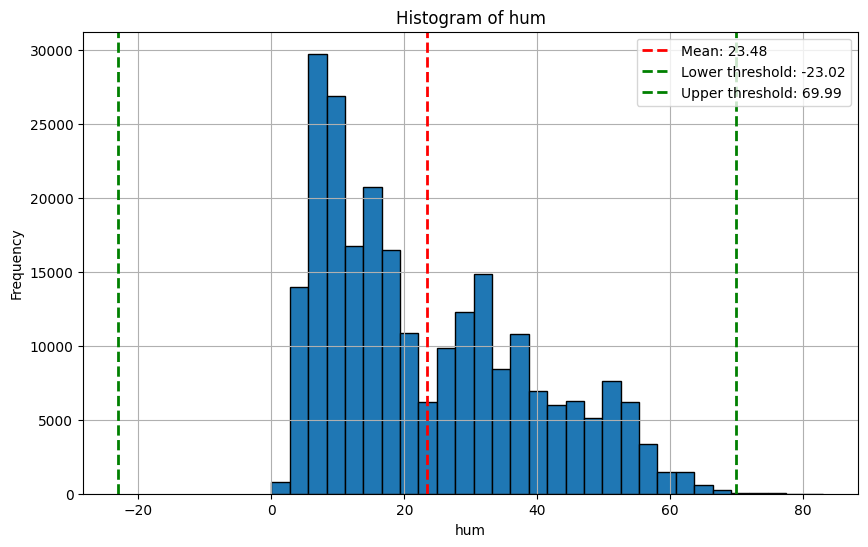

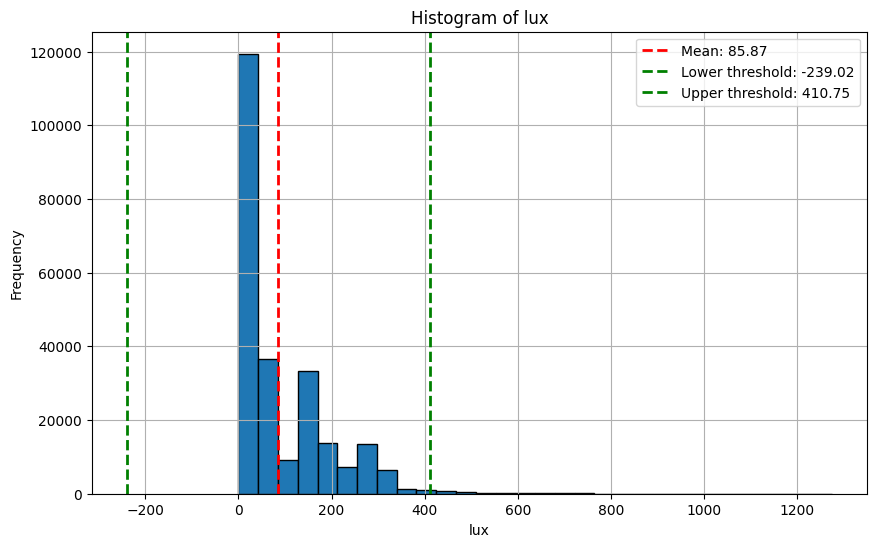

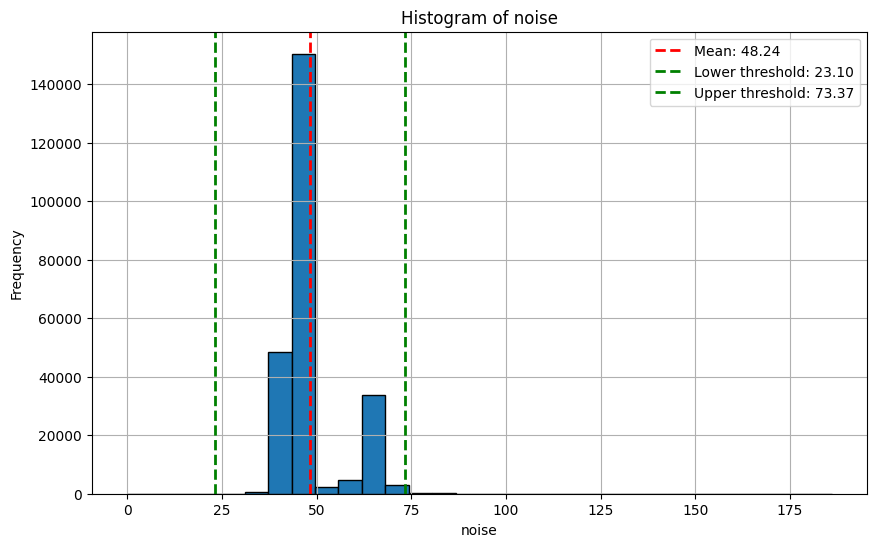

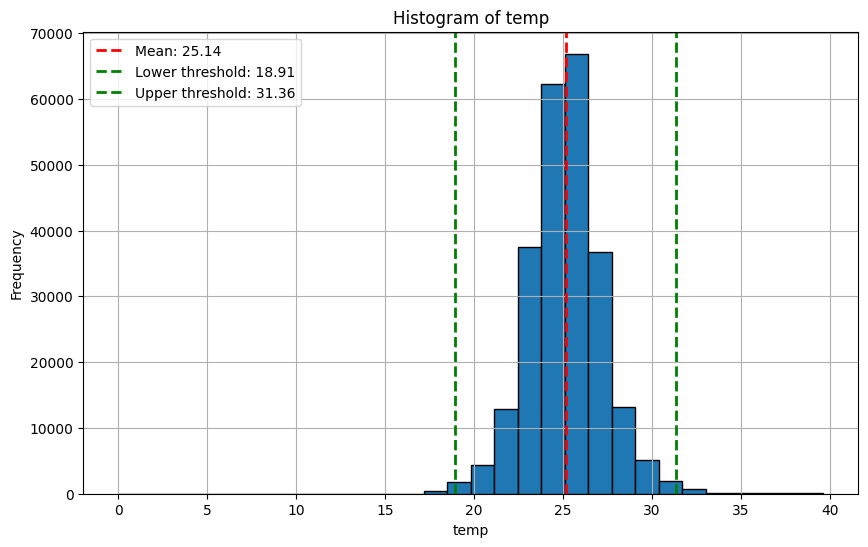

Обработка DataFrame: L


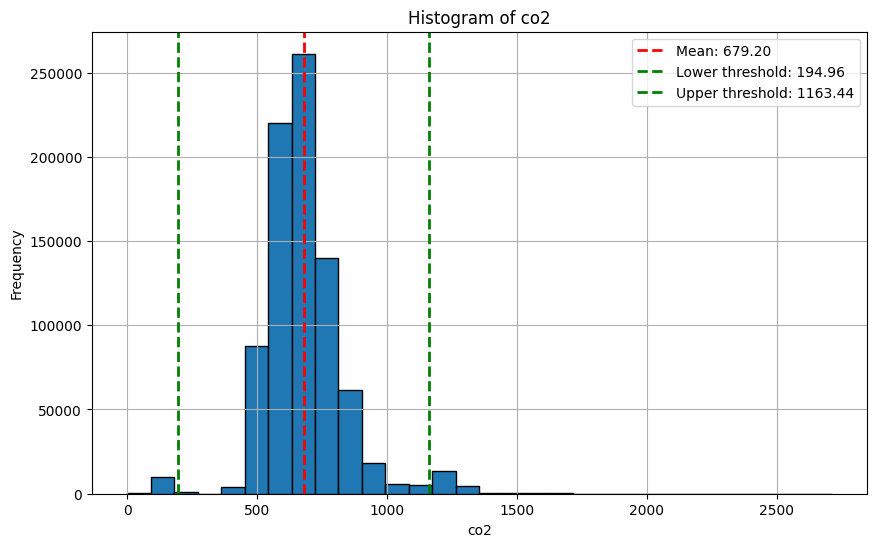

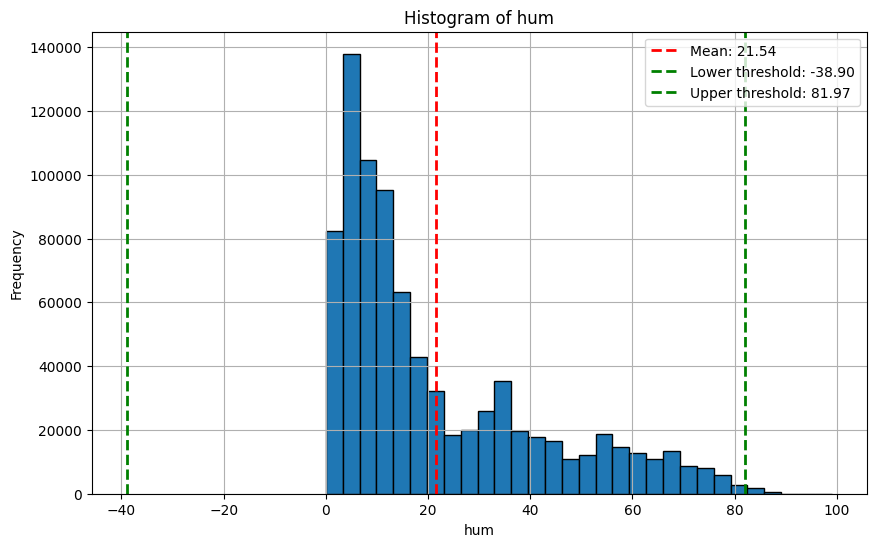

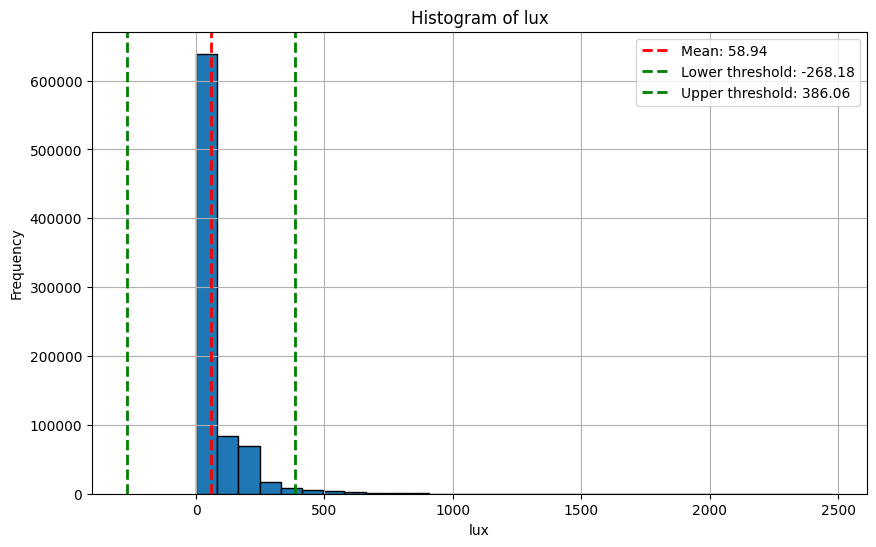

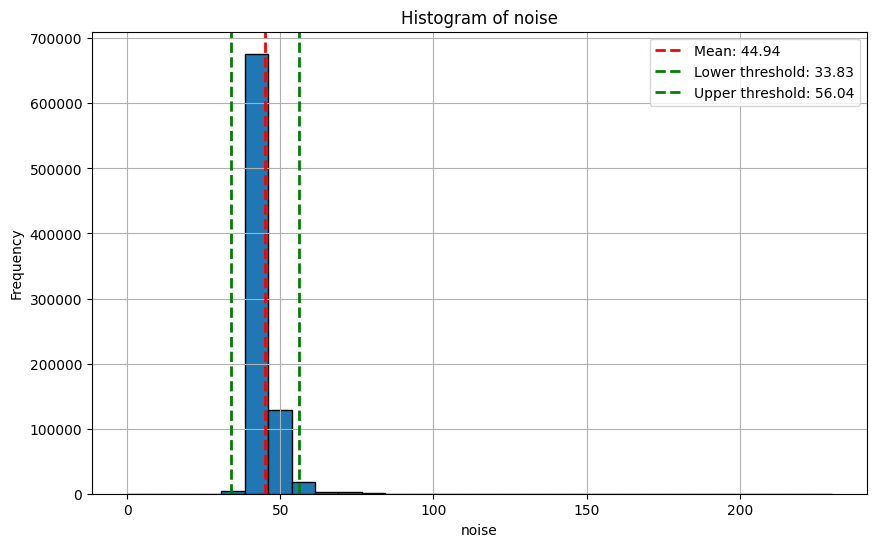

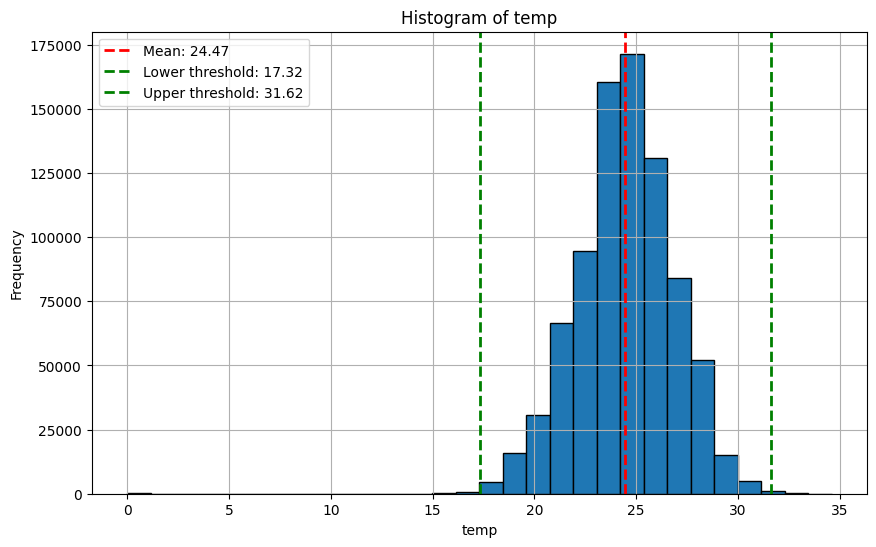

Обработка DataFrame: M


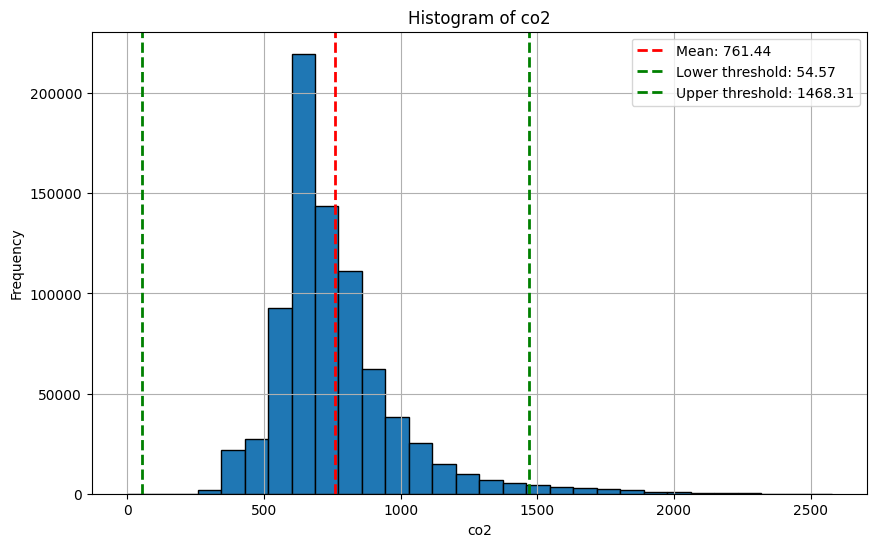

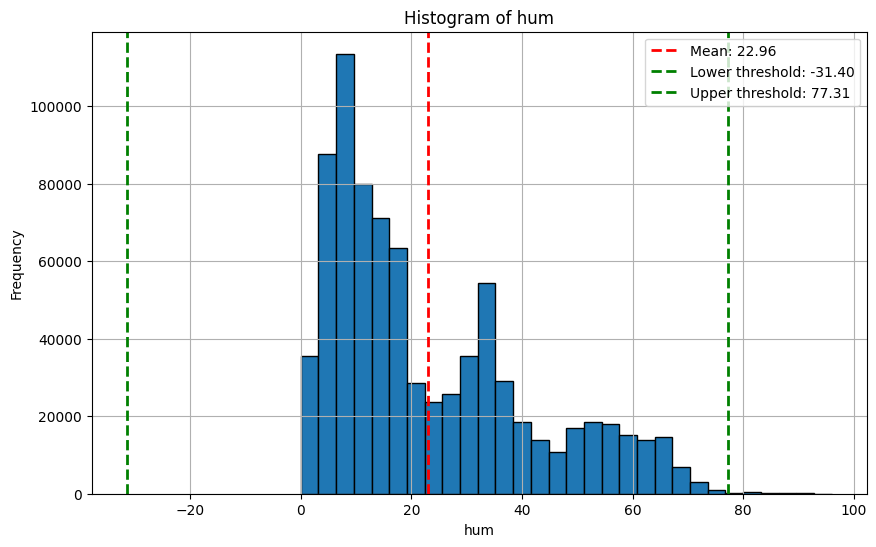

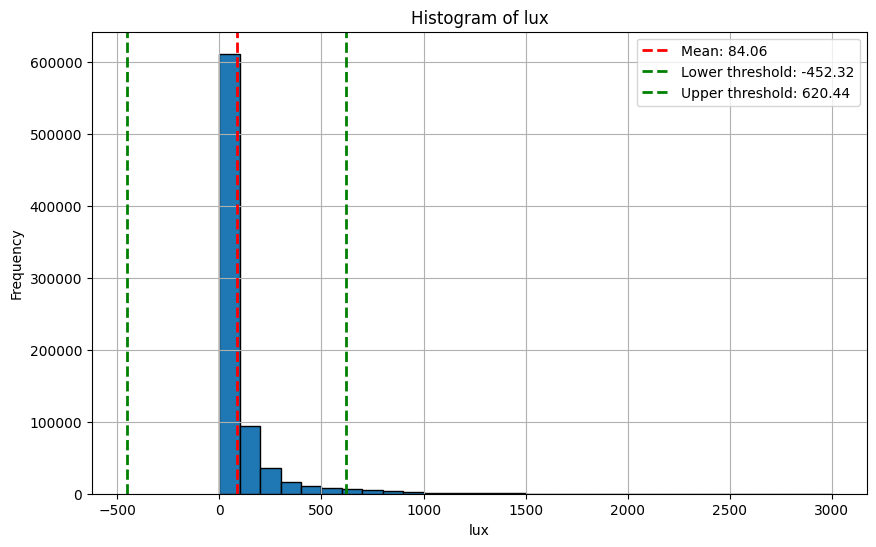

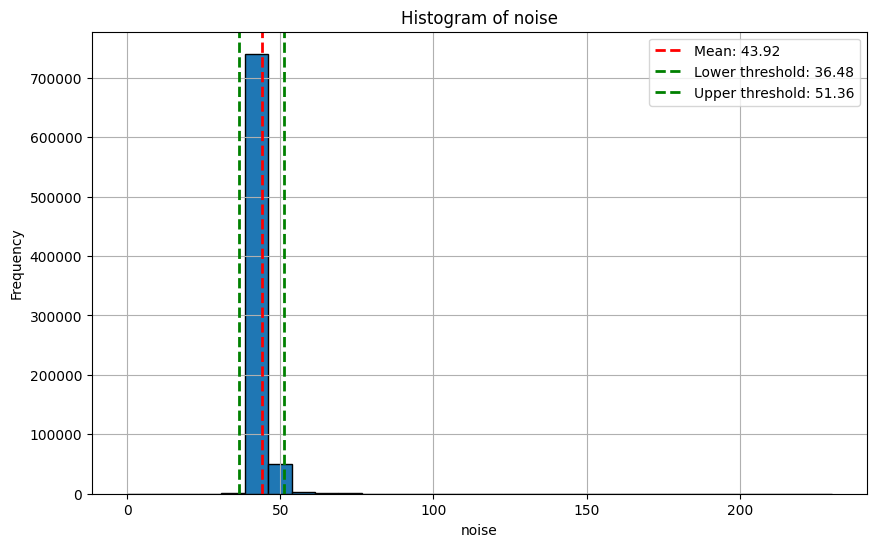

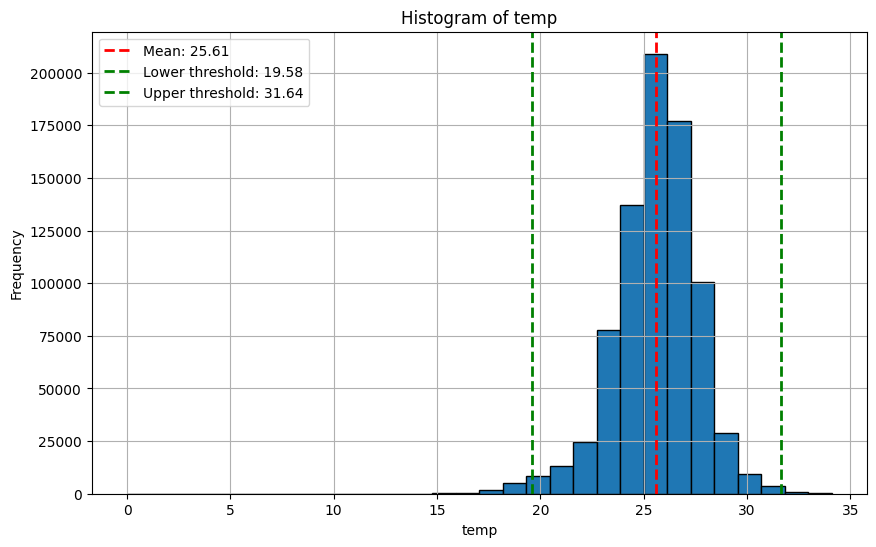

In [23]:
def plot_histograms(df, param):
    """
    Функция для построения гистограмм для заданного параметра DataFrame.
    
    Параметры:
    df (pandas.DataFrame): DataFrame, для которого нужно построить гистограммы.
    param (str): Название параметра, для которого нужно построить гистограммы.
    """
    # Вычисление среднего и стандартного отклонения для параметра
    mean = df[param].mean()
    std = df[param].std()
    
    # Построение гистограммы
    plt.figure(figsize=(10, 6))
    df[param].hist(bins=30, edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(mean - 3 * std, color='green', linestyle='dashed', linewidth=2, label=f'Lower threshold: {mean - 3 * std:.2f}')
    plt.axvline(mean + 3 * std, color='green', linestyle='dashed', linewidth=2, label=f'Upper threshold: {mean + 3 * std:.2f}')
    plt.title(f"Histogram of {param}")
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Построение гистограмм для каждого параметра в каждом DataFrame
names = ['E', 'D', 'A', 'S', 'B', 'L', 'M']
c = 0
for df in [df_E, df_D, df_A, df_S, df_B, df_L, df_M]:
    print(f"Обработка DataFrame: {names[c]}")
    c += 1
    plot_histograms(df, "co2")
    plot_histograms(df, "hum")
    plot_histograms(df, "lux")
    plot_histograms(df, "noise")
    plot_histograms(df, "temp")